In [52]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from os.path import expanduser
home_dir = expanduser("~")
module_path = home_dir + '/code/modules/'
import sys
sys.path.append(module_path)
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import pickle
import matplotlib.pyplot as plt
from data_processing import get_unit_dict
%matplotlib notebook


#### Interactive surface plots of observable statistics

In [62]:
data_folder = 'backprop_and_pso_trained' # backprop_and_pso_trained, pso_trained
network_name = '6x6_all-points_redshifts00-01-02-05-10-20-30-40-60-80_train-test-val080-010-010_tanh_Halo_mass_peak-Scale_peak_mass-Halo_growth_rate-Halo_radius-Redshift_to_Stellar_mass-SFR_test_score4.37e-07__fq-ssfr-smf-csfrd-wp_1-1-1-1-1_inertiaStart5_200Explore_new'

iteration = '1-42'


dictionary = pickle.load(open(
    '/home/magnus/trained_networks/{}/real_observations/'.format(data_folder) + network_name + 
    '/figures_train_weights/train_data/all_losses/surf/iteration_{}.pickle'.format(iteration), 'rb'
))

<IPython.core.display.Javascript object>


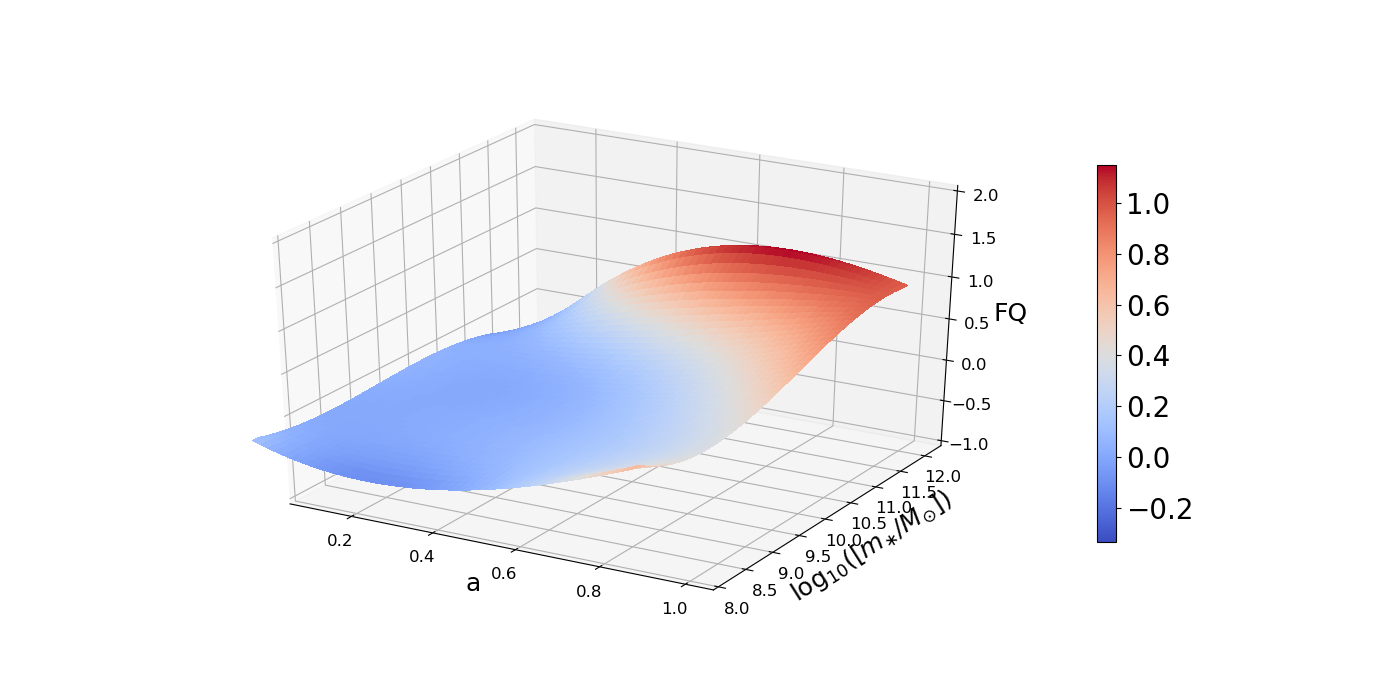

In [63]:
unit_dict = get_unit_dict()
fig = plt.figure(figsize=(14,7))
i_statistic = 2
plot_names = ['ssfr', 'SMF', 'fq']
x_label = 'a'
y_label = 'log$_{{10}}([{}])$'.format(unit_dict['Stellar_mass'])
z_labels = [
    'SSFR',
    'log($[{}])$'.format(unit_dict['SMF']),
    'FQ',
]
ax = plt.subplot(111, projection='3d')

# grid_scale_factor_data = [scale_factors_grid_vals_ssfr, scale_factors_grid_vals_smf, scale_factors_grid_vals_fq]
# grid_stellar_mass_data = [masses_grid_vals_ssfr, masses_grid_vals_smf, masses_grid_vals_fq]
# pred_grid_data = [grid_vals_ssfr, grid_vals_smf, grid_vals_fq]

# sc = ax.scatter(dictionary['obs_scale_factors'][i_statistic], dictionary['obs_masses'][i_statistic], dictionary['obs_data'][i_statistic], 
#              'g', s=3, alpha=0.3)
# for i_point in np.arange(0, len(dictionary['obs_data'][i_statistic])):
#     ax.plot(
#         [dictionary['obs_scale_factors'][i_statistic][i_point], dictionary['obs_scale_factors'][i_statistic][i_point]], 
#         [dictionary['obs_masses'][i_statistic][i_point], dictionary['obs_masses'][i_statistic][i_point]], 
#         [
#             dictionary['obs_data'][i_statistic][i_point]+dictionary['obs_errors'][i_statistic][i_point], 
#             dictionary['obs_data'][i_statistic][i_point]-dictionary['obs_errors'][i_statistic][i_point]
#         ], 
#          'g', marker="_", alpha=0.3
#     )
surf = ax.plot_surface(dictionary['scale_factors'][i_statistic], dictionary['masses'][i_statistic], 
                       dictionary['pred_values'][i_statistic], cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=1)
 
cb = fig.colorbar(surf, shrink=.7)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=20)

ax.set_xlabel(x_label, fontsize=18)
ax.set_ylabel(y_label, fontsize=18)
ax.set_zlabel(z_labels[i_statistic], fontsize=18)
ax.tick_params(labelsize=12)

if plot_names[i_statistic] == 'fq':
    ax.set_zlim(top=2, bottom=-1)
    ax.set_ylim(bottom=8)
# fig.colorbar(surf, shrink=.7, aspect=10)
#plt.title(plot_names[i_statistic], fontsize=20)
plt.show()

In [46]:
fig.savefig('figures/surface_plot_notitle.png')

### Surface plot of Emerge predictions for 3 statistics

In [ ]:
get_ssfr_smf_fq_surface_plot(predicted_points, training_data_dict, loss_dict, title=title, 
                                             data_type=dictionary['data_type'], save_data=True,
                                             file_path=file_path, running_from_script=True)